
# Winning Prediction of Football Match 


In [1]:
#Import Essential Library:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix

In [2]:
get_ipython().run_line_magic('matplotlib', 'inline')

In [3]:
#Reading Dataset
data = pd.read_csv(r"C:\Users\aziz\Desktop\Lab Project\epl.csv")

In [4]:
data.head(10)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,10/8/2018,Man United,Leicester,2,1,H,1,0,H,...,6,4,11,8,2,5,2,1,0,0
1,E0,11/8/2018,Bournemouth,Cardiff,2,0,H,1,0,H,...,4,1,11,9,7,4,1,1,0,0
2,E0,11/8/2018,Fulham,Crystal Palace,0,2,A,0,1,A,...,6,9,9,11,5,5,1,2,0,0
3,E0,11/8/2018,Huddersfield,Chelsea,0,3,A,0,2,A,...,1,4,9,8,2,5,2,1,0,0
4,E0,11/8/2018,Newcastle,Tottenham,1,2,A,1,2,A,...,2,5,11,12,3,5,2,2,0,0
5,E0,11/8/2018,Watford,Brighton,2,0,H,1,0,H,...,5,0,10,16,8,2,2,2,0,0
6,E0,11/8/2018,Wolves,Everton,2,2,A,1,1,D,...,4,5,8,7,3,6,0,1,0,1
7,E0,12/8/2018,Arsenal,Man City,0,2,A,0,1,A,...,3,8,11,14,2,9,2,2,0,0
8,E0,12/8/2018,Liverpool,West Ham,4,0,H,2,0,H,...,8,2,14,9,5,4,1,2,0,0
9,E0,12/8/2018,Southampton,Burnley,0,0,H,0,0,D,...,3,6,10,9,8,5,0,1,0,0


In [5]:
#Showing all columns:
data.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR'],
      dtype='object')

In [6]:
#Now Drop the columns name which are not needed:
x = data.drop(['Div','Date'],axis=1)
x = x.dropna()

In [7]:
#Now Drop the column name which we will work with:
y= x['FTR']
x = x.drop(['FTR'],axis=1)

In [8]:
#Categorical boolean mask:
categorical_feature_mask = x.dtypes==object

In [9]:
#Filter categorical columns using mask and turn it into a list:
categorical_cols = x.columns[categorical_feature_mask].tolist()

In [10]:
#Import labelencoder:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()

In [12]:
#Convert categorical features data into numeric data:
x[categorical_cols] = x[categorical_cols].apply(lambda col: le.fit_transform(col))

In [13]:
#Check Updated dataset with labelencoder
x[categorical_cols].head(10)

,HomeTeam,AwayTeam,HTR,Referee
0,13,10,2,1
1,1,4,2,8
2,8,6,0,12
3,9,5,0,3
4,14,16,0,11
5,17,2,2,7
6,19,7,1,4
7,0,12,0,13
8,11,18,2,2
9,15,3,1,6


In [14]:
le.fit(y)

LabelEncoder()

In [15]:
#Now transform the y axis data into numerical data:
s = le.transform(y)
y = s

In [16]:
#We are gonna train our data:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=83)


# Logistic Regression




In [18]:
#Now import Logistic Model
from sklearn.linear_model import LogisticRegression

In [19]:
log = LogisticRegression()
log.fit(X_train, y_train)

C:\Users\aziz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
#Accuracy score of wining using LogisticRegression(0-1):
log.score(X_train, y_train)

0.9539473684210527

In [21]:
log.score(X_test, y_test)

0.881578947368421

                                                 Prediction

In [22]:
y_pred = log.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1])

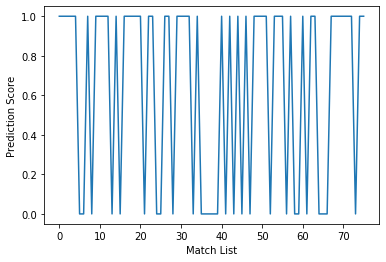

In [23]:
prediction = np.array(y_pred)

plt.ylabel("Prediction Score")
plt.xlabel("Match List")
plt.plot(prediction)

plt.show()

                                              Find Absolute Error 

In [24]:
mean_absolute_error(y_test, y_pred)

0.11842105263157894

                                       Model Evaluation using Confusion Matrix

In [25]:
#confusion_matrix(expected result, predicted result):
cmlog = confusion_matrix(y_test, y_pred)
cmlog

array([[23,  4],
       [ 5, 44]], dtype=int64)

                                     Visualizing Confusion Matrix using Heatmap

Text(69.0, 0.5, 'Actual label')

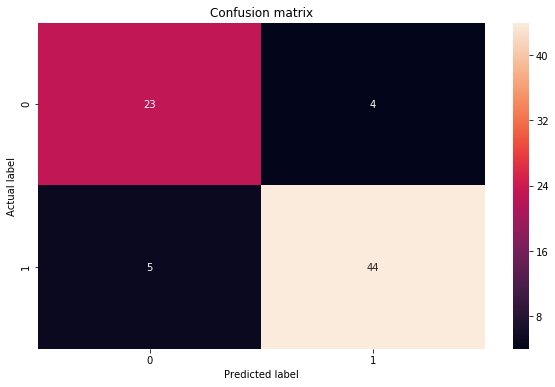

In [26]:
import seaborn as sn
plt.figure(figsize = (10,6))
sn.heatmap(cmlog, annot=True)
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [27]:
#Sensitivity = d/(c+d):
sensitivity_lr = cmlog[1,1]/(cmlog[1,0]+cmlog[1,1])
sensitivity_lr

0.8979591836734694

In [28]:
#Specificity = a/(a+b):
specificity_lr = cmlog[0,0]/(cmlog[0,0]+cmlog[0,1])
specificity_lr

0.8518518518518519

In [29]:
metrics.precision_score(y_test, y_pred, average='micro')

0.881578947368421

In [30]:
metrics.precision_score(y_test, y_pred, average='macro')

0.8690476190476191

In [31]:
metrics.precision_score(y_test, y_pred, average='weighted')

0.8828320802005012

In [32]:
#matthews_corrcoef(y_test, y_pred)
matthews_corrcoef(y_test, y_pred)

0.7439300738594313

In [33]:
y_test

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1])

                                            Classification report

In [34]:
from sklearn.metrics import classification_report

In [35]:
y_test =[1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1]
y_pred = [1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1]
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.82      0.85      0.84        27
     class 1       0.92      0.90      0.91        49

    accuracy                           0.88        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.88      0.88      0.88        76



                                         Confusion Matrix Evaluation 

In [36]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.881578947368421
Precision: 0.9166666666666666
Recall: 0.8979591836734694





Well, you got a classification rate of 88%, considered as good accuracy.

Precision: Precision is about being precise, i.e., how accurate our model is. In other words, we can say, when a model makes a prediction, how often it is correct. In our prediction case, when our Logistic Regression model predicted hometeam match are going to win from awayteam, that team have 91% of the time.

Recall: If there are hometeam have won result in the test set and our Logistic Regression model can identify it 89% of the time.

                           Receiver Operating Characteristic curve(ROC) for Logistic Regression

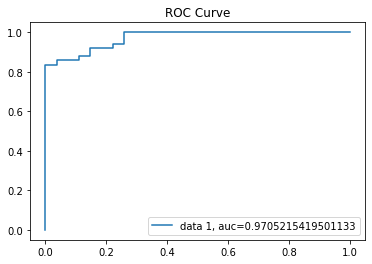

In [37]:
y_pred_proba = log.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title('ROC Curve')
plt.show()

AUC score for the case is 0.97. AUC score 1 represents perfect classifier, and 0.3 represents a worthless classifier.


# K-Nearest Neighbors
        

In [38]:
#Import KNeighborsClassifier to find the Nearest value:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn = KNeighborsClassifier(n_neighbors=1)

In [40]:
knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [41]:
knn.score(X_train,y_train)

1.0

In [42]:
knn.score(X_test,y_test)

1.0

                                         
                                                    Prediction
        

In [43]:
y_pred = knn.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1])

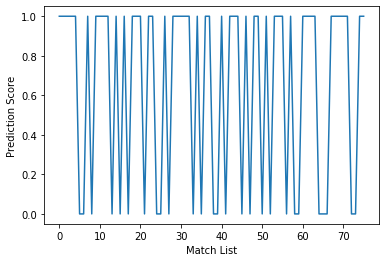

In [44]:
prediction = np.array(y_pred)

plt.ylabel("Prediction Score")
plt.xlabel("Match List")
plt.plot(prediction)

plt.show()

In [45]:
#Check Results from (10-20) when n_neighbors=3:
for i in range(80,85):
    knn = KNeighborsClassifier(n_neighbors=2)
    knn.fit(x,y)
    print(knn.score(X_test,y_test))

0.8026315789473685
0.8026315789473685
0.8026315789473685
0.8026315789473685
0.8026315789473685


                                              Find Absolute Error 

In [46]:
mean_absolute_error(y_test, y_pred)

0.0

                                      Model Evaluation using Confusion Matrix

In [47]:
#confusion_matrix(expected result, predicted result):
cmknn = confusion_matrix(y_test, y_pred)

In [48]:
cmknn

array([[27,  0],
       [ 0, 49]], dtype=int64)

                                     Visualizing Confusion Matrix using Heatmap

Text(69.0, 0.5, 'Actual label')

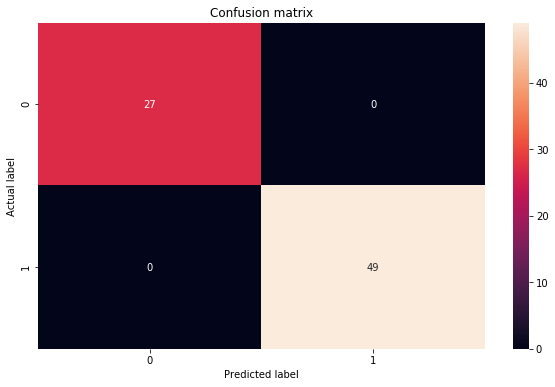

In [49]:
plt.figure(figsize = (10,6))
sn.heatmap(cmknn, annot=True)
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [50]:
#Sensitivity = d/(c+d):
sensitivity_lr = cmknn[1,1]/(cmknn[1,0]+cmknn[1,1])
sensitivity_lr

1.0

In [51]:
#Specificity = a/(a+b):
specificity_lr = cmknn[0,0]/(cmknn[0,0]+cmknn[0,1])
specificity_lr

1.0

In [52]:
metrics.precision_score(y_test, y_pred, average='micro')

1.0

In [53]:
metrics.precision_score(y_test, y_pred, average='macro')

1.0

In [54]:
metrics.precision_score(y_test, y_pred, average='weighted')

1.0

In [55]:
matthews_corrcoef(y_test, y_pred)

1.0

In [56]:
y_test

[1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1]

                                         Classification report

In [57]:
y_test =[1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1]
y_pred = [1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1]
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.82      0.85      0.84        27
     class 1       0.92      0.90      0.91        49

    accuracy                           0.88        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.88      0.88      0.88        76



                                         Confusion Matrix Evaluation 

In [58]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.881578947368421
Precision: 0.9166666666666666
Recall: 0.8979591836734694


Well, you got a classification rate of 100%, considered as good accuracy.

Precision: Precision is about being precise, i.e., how accurate our model is. In other words, we can say, when a model makes a prediction, how often it is correct. In our prediction case, when our K-Nearest Neighbors model predicted hometeam match are going to win from awayteam, that team have 100% of the time.

Recall: If there are hometeam have won result in the test set and our K-Nearest Neighbors model can identify it 100% of the time.


# Support Vector Machine (SVM)



In [59]:
#Import Support Vector Machine
from sklearn import svm

In [60]:
#Apply Support Vector Classification
SVM = svm.SVC()

In [61]:
SVM.fit(x, y)

C:\Users\aziz\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [62]:
SVM.score(X_train,y_train)

1.0

In [63]:
SVM.score(X_test,y_test)

1.0

In [64]:
y_pred = SVM.predict(X_test)

In [65]:
y_pred

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1])

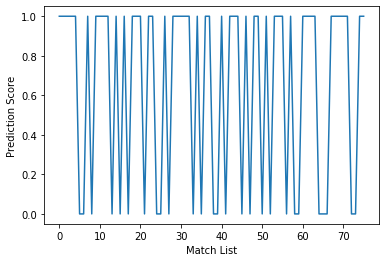

In [66]:
prediction = np.array(y_pred)

plt.ylabel("Prediction Score")
plt.xlabel("Match List")
plt.plot(prediction)

plt.show()

                                            Find Absolute Error 

In [67]:
mean_absolute_error(y_test, y_pred)

0.0

                                  Model Evaluation using Confusion Matrix

In [68]:
##confusion_matrix = confusion_matrix(expected, predicted)
cmSVM= confusion_matrix(y_test, y_pred)
cmSVM

array([[27,  0],
       [ 0, 49]], dtype=int64)

                                    Visualizing Confusion Matrix using Heatmap

Text(69.0, 0.5, 'Actual label')

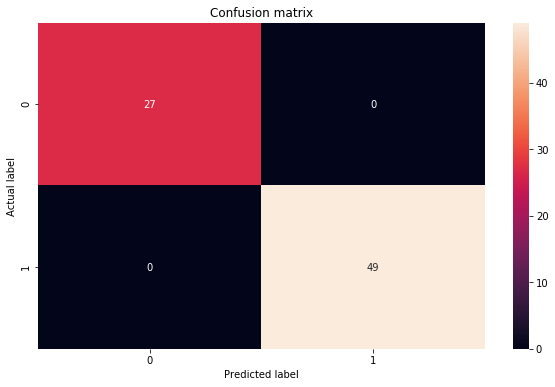

In [69]:
plt.figure(figsize = (10,6))
sn.heatmap(cmSVM, annot=True)
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [70]:
#Sensitivity = d/(c+d):
sensitivitySVM = cmSVM[1,1]/(cmSVM[1,0]+cmSVM[1,1])
sensitivitySVM

1.0

In [71]:
#Specificity = a/(a+b):
specificitysvm = cmSVM[0,0]/(cmSVM[0,0]+cmSVM[0,1])
specificitysvm

1.0

In [72]:
metrics.precision_score(y_test, y_pred, average='micro')

1.0

In [73]:
metrics.precision_score(y_test, y_pred, average='macro')

1.0

In [74]:
metrics.precision_score(y_test, y_pred, average='weighted')

1.0

In [75]:
matthews_corrcoef(y_test, y_pred)

1.0

In [76]:
y_test

[1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1]

In [77]:
y_test =[1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1]
y_pred = [1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1]
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.82      0.85      0.84        27
     class 1       0.92      0.90      0.91        49

    accuracy                           0.88        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.88      0.88      0.88        76



                                         Confusion Matrix Evaluation

In [78]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.881578947368421
Precision: 0.9166666666666666
Recall: 0.8979591836734694


Well, you got a classification rate of 100%, considered as good accuracy.

Precision: Precision is about being precise, i.e., how accurate our model is. In other words, we can say, when a model makes a prediction, how often it is correct. In our prediction case, when our Support Vector Machine model predicted hometeam match are going to win from awayteam, that team have 100% of the time.

Recall: If there are hometeam have won result in the test set and our Support Vector Machine model can identify it 100% of the time.


# Random Forest



In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [80]:
x, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)

In [81]:
rfs = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=82)

In [82]:
rfs.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=82, verbose=0,
                       warm_start=False)

In [83]:
rfs.score(X_test,y_test)

0.868421052631579

In [84]:
y_pred = rfs.predict(X_test)

In [85]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1])

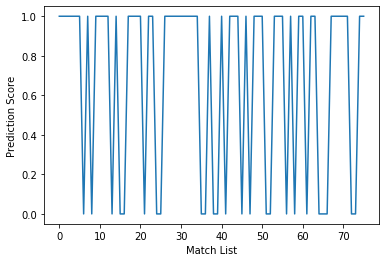

In [86]:
prediction = np.array(y_pred)

plt.ylabel("Prediction Score")
plt.xlabel("Match List")
plt.plot(prediction)

plt.show()

                                         Find Absolute Error 

In [87]:
mean_absolute_error(y_test, y_pred)

0.13157894736842105

                                Model Evaluation using Confusion Matrix

In [88]:
##confusion_matrix = confusion_matrix(expected, predicted)
cm_rf= confusion_matrix(y_test, y_pred)
cm_rf

array([[21,  6],
       [ 4, 45]], dtype=int64)

                               Visualizing Confusion Matrix using Heatmap

Text(69.0, 0.5, 'Actual label')

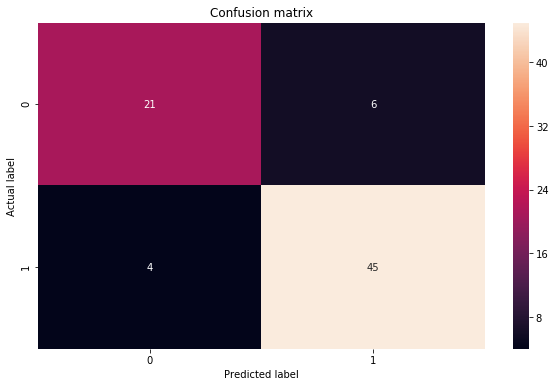

In [89]:
plt.figure(figsize = (10,6))
sn.heatmap(cm_rf, annot=True)
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [90]:
#Sensitivity = d/(c+d):
sensitivity_rf = cm_rf[1,1]/(cm_rf[1,0]+cm_rf[1,1])
sensitivity_rf

0.9183673469387755

In [91]:
#Specificity = a/(a+b):
specificity_rf = cm_rf[0,0]/(cm_rf[0,0]+cm_rf[0,1])
specificity_rf

0.7777777777777778

In [92]:
metrics.precision_score(y_test, y_pred, average='micro')

0.868421052631579

In [93]:
metrics.precision_score(y_test, y_pred, average='macro')

0.8611764705882352

In [94]:
metrics.precision_score(y_test, y_pred, average='weighted')

0.8673065015479875

In [95]:
matthews_corrcoef(y_test, y_pred)

0.7091279703443258

In [96]:
y_test

[1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1]

                                       Classification Report 

In [97]:
y_test =[1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1]
y_pred = [1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1]
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.82      0.85      0.84        27
     class 1       0.92      0.90      0.91        49

    accuracy                           0.88        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.88      0.88      0.88        76



In [98]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.881578947368421
Precision: 0.9166666666666666
Recall: 0.8979591836734694


Well, you got a classification rate of 86%, considered as good accuracy.

Precision: Precision is about being precise, i.e., how accurate our model is. In other words, we can say, when a model makes a prediction, how often it is correct. In our prediction case, when our Random Forest model predicted hometeam match are going to win from awayteam, that team have 88% of the time.

Recall: If there are hometeam have won result in the test set and our Random Forest model can identify it 91% of the time.


# Naive Bayes Classification


In [99]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [100]:
#Create a Gaussian Classifier
nb_model = GaussianNB()

In [101]:
# Train the model using the training sets
nb_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [102]:
nb_model.score(X_test,y_test)

0.868421052631579

In [103]:
y_pred = nb_model.predict(X_test)
y_pred 

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1])

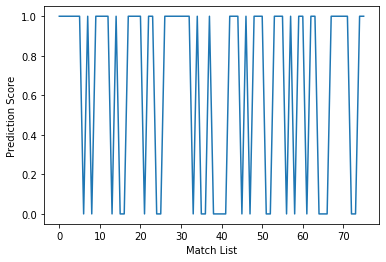

In [104]:
prediction = np.array(y_pred)

plt.ylabel("Prediction Score")
plt.xlabel("Match List")
plt.plot(prediction)

plt.show()

                                                Find Absolute Error 

In [105]:
mean_absolute_error(y_test, y_pred)

0.13157894736842105

                                        Model Evaluation using Confusion Matrix

In [106]:
##confusion_matrix = confusion_matrix(expected, predicted)
cm_nb= confusion_matrix(y_test, y_pred)
cm_nb

array([[22,  5],
       [ 5, 44]], dtype=int64)

                                     Visualizing Confusion Matrix using Heatmap

Text(69.0, 0.5, 'Actual label')

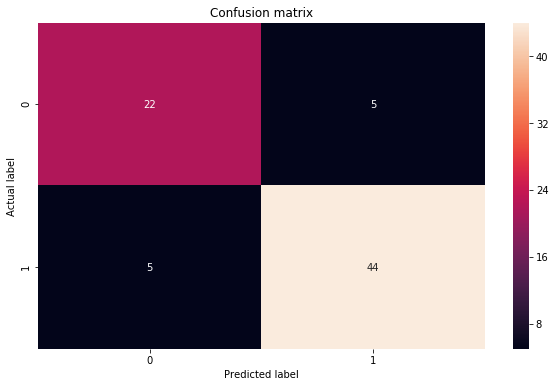

In [107]:
plt.figure(figsize = (10,6))
sn.heatmap(cm_nb, annot=True)
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [108]:
#Sensitivity = d/(c+d):
sensitivity_nb = cm_nb[1,1]/(cm_nb[1,0]+cm_nb[1,1])
sensitivity_nb

0.8979591836734694

In [109]:
#Specificity = a/(a+b):
specificity_nb = cm_nb[0,0]/(cm_nb[0,0]+cm_nb[0,1])
specificity_nb

0.8148148148148148

In [110]:
metrics.precision_score(y_test, y_pred, average='micro')

0.868421052631579

In [111]:
metrics.precision_score(y_test, y_pred, average='macro')

0.8563869992441421

In [112]:
metrics.precision_score(y_test, y_pred, average='weighted')

0.868421052631579

In [113]:
matthews_corrcoef(y_test, y_pred)

0.7127739984882842

In [114]:
y_test

[1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1]

                                           Classification Report 

In [115]:
y_test =[1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1]
y_pred = [1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1]
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.82      0.85      0.84        27
     class 1       0.92      0.90      0.91        49

    accuracy                           0.88        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.88      0.88      0.88        76



In [116]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.881578947368421
Precision: 0.9166666666666666
Recall: 0.8979591836734694


Well, you got a classification rate of 86%, considered as good accuracy.

Precision: Precision is about being precise, i.e., how accurate our model is. In other words, we can say, when a model makes a prediction, how often it is correct. In our prediction case, when our Naive Bayes Classification predicted hometeam match are going to win from awayteam, that team have 89% of the time.

Recall: If there are hometeam have won result in the test set and our Naive Bayes Classification can identify it 89% of the time.


# Ada Boost Classifier


In [117]:
# Load libraries:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

In [118]:
X, y = make_classification(n_samples=300, n_features=4,
n_informative=2, n_redundant=0,
random_state=0, shuffle=False)

In [119]:
# Create adaboost classifer object:
adab = AdaBoostClassifier(n_estimators=100, random_state=0)
adab.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [120]:
adab.score(X_test,y_test)

0.9078947368421053

In [121]:
adab.score(X_train, y_train)

1.0

In [122]:
y_pred = adab.predict(X_test)
y_pred 

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1])

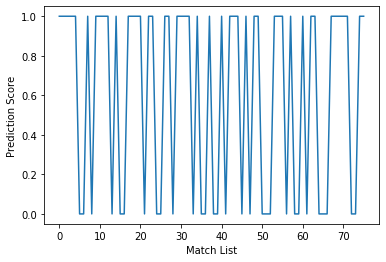

In [123]:
prediction = np.array(y_pred)

plt.ylabel("Prediction Score")
plt.xlabel("Match List")
plt.plot(prediction)

plt.show()

                                              Find Absolute Error

In [124]:
mean_absolute_error(y_test, y_pred)

0.09210526315789473

                                   Model Evaluation using Confusion Matrix

In [125]:
##confusion_matrix = confusion_matrix(expected, predicted)
cm_adab= confusion_matrix(y_test, y_pred)
cm_adab

array([[25,  2],
       [ 5, 44]], dtype=int64)

                                  Visualizing Confusion Matrix using Heatmap

Text(69.0, 0.5, 'Actual label')

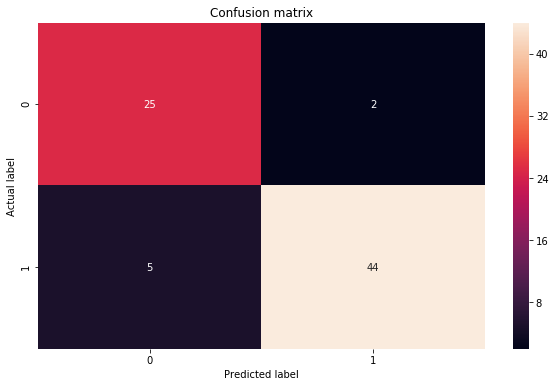

In [126]:
plt.figure(figsize = (10,6))
sn.heatmap(cm_adab, annot=True)
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [127]:
#Sensitivity = d/(c+d):
sensitivity_adab = cm_adab[1,1]/(cm_adab[1,0]+cm_adab[1,1])
sensitivity_adab

0.8979591836734694

In [128]:
#Specificity = a/(a+b):
specificity_adab = cm_adab[0,0]/(cm_adab[0,0]+cm_adab[0,1])
specificity_adab

0.9259259259259259

In [129]:
metrics.precision_score(y_test, y_pred, average='micro')

0.9078947368421053

In [130]:
metrics.precision_score(y_test, y_pred, average='macro')

0.894927536231884

In [131]:
metrics.precision_score(y_test, y_pred, average='weighted')

0.9127574370709383

In [132]:
matthews_corrcoef(y_test, y_pred)

0.8066906674459857

In [133]:
y_test

[1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1]

                                              Classification Report 

In [134]:
y_test =[1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1]
y_pred = [1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1]
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.82      0.85      0.84        27
     class 1       0.92      0.90      0.91        49

    accuracy                           0.88        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.88      0.88      0.88        76



In [135]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.881578947368421
Precision: 0.9166666666666666
Recall: 0.8979591836734694


Well, you got a classification rate of 90%, considered as good accuracy.

Precision: Precision is about being precise, i.e., how accurate our model is. In other words, we can say, when a model makes a prediction, how often it is correct. In our prediction case, when our AdaBoost Classifier predicted hometeam match are going to win from awayteam, that team have 95% of the time.

Recall: If there are hometeam have won result in the test set and our AdaBoost Classifier can identify it 89% of the time.


# Linear Discriminant Analysis


In [136]:
# Load libraries:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
ld = LinearDiscriminantAnalysis()

In [137]:
ld.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [138]:
ld.score(X_train,y_train)

0.9375

In [139]:
ld.score(X_test,y_test)

0.8552631578947368

In [140]:
y_pred = ld.predict(X_test)
y_pred 

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1])

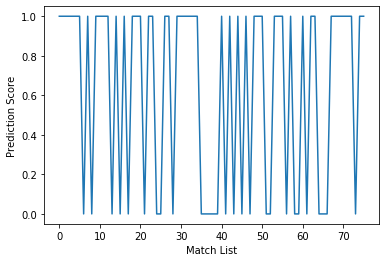

In [141]:
prediction = np.array(y_pred)

plt.ylabel("Prediction Score")
plt.xlabel("Match List")
plt.plot(prediction)

plt.show()

                                           Find Absolute Error

In [142]:
mean_absolute_error(y_test, y_pred)

0.14473684210526316

                                 Model Evaluation using Confusion Matrix

In [143]:
##confusion_matrix = confusion_matrix(expected, predicted)
cm_ld = confusion_matrix(y_test, y_pred)
cm_ld

array([[22,  5],
       [ 6, 43]], dtype=int64)

                                 Visualizing Confusion Matrix using Heatmap

Text(69.0, 0.5, 'Actual label')

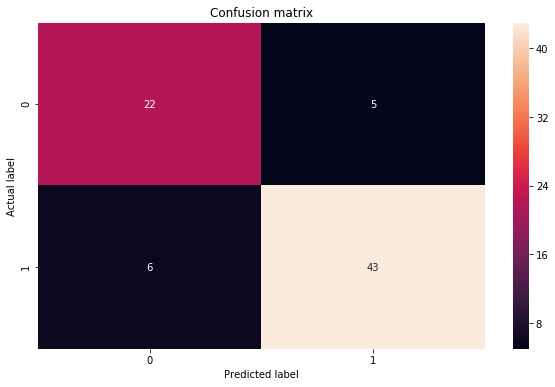

In [144]:
plt.figure(figsize = (10,6))
sn.heatmap(cm_ld, annot=True)
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [145]:
sensitivity_ld = cm_ld[0,0]/(cm_ld[0,0]+cm_ld[0,1])
sensitivity_ld

0.8148148148148148

In [146]:
specificity_ld = cm_ld[1,1]/(cm_ld[1,0]+cm_ld[1,1])
specificity_ld

0.8775510204081632

In [147]:
metrics.precision_score(y_test, y_pred, average='micro')

0.8552631578947368

In [148]:
metrics.precision_score(y_test, y_pred, average='macro')

0.8407738095238095

In [149]:
metrics.precision_score(y_test, y_pred, average='weighted')

0.8567120927318296

In [150]:
matthews_corrcoef(y_test, y_pred)

0.6869354311040717

In [151]:
y_test

[1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1]

                                            Classification Report 

In [152]:
y_test =[1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1]
y_pred = [1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1]
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.82      0.85      0.84        27
     class 1       0.92      0.90      0.91        49

    accuracy                           0.88        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.88      0.88      0.88        76



In [153]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.881578947368421
Precision: 0.9166666666666666
Recall: 0.8979591836734694


Well, you got a classification rate of 85%, considered as good accuracy.

Precision: Precision is about being precise, i.e., how accurate our model is. In other words, we can say, when a model makes a prediction, how often it is correct. In our prediction case, when our Linear Discriminant Analysis predicted hometeam match are going to win from awayteam, that team have 89% of the time.

Recall: If there are hometeam have won result in the test set and our Linear Discriminant Analysis can identify it 87% of the time.


# Gradient Boosting Classifier


In [154]:
#Load Libraies:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [155]:
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.05, max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=2,
                           max_features=2, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [156]:
gb.score(X_train,y_train)

0.8980263157894737

In [157]:
gb.score(X_test,y_test)

0.8421052631578947

In [158]:
y_pred = gb.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1])

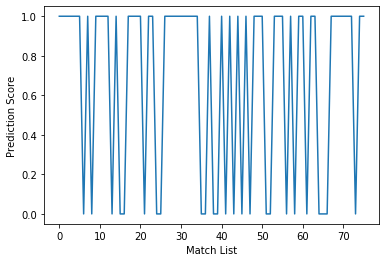

In [159]:
prediction = np.array(y_pred)

plt.ylabel("Prediction Score")
plt.xlabel("Match List")
plt.plot(prediction)

plt.show()

                                            Find Absolute Error

In [160]:
mean_absolute_error(y_test, y_pred)

0.15789473684210525

                                    Model Evaluation using Confusion Matrix

In [161]:
cm_gb = confusion_matrix(y_test, y_pred)
cm_gb

array([[20,  7],
       [ 5, 44]], dtype=int64)

                                   Visualizing Confusion Matrix using Heatmap

Text(69.0, 0.5, 'Actual label')

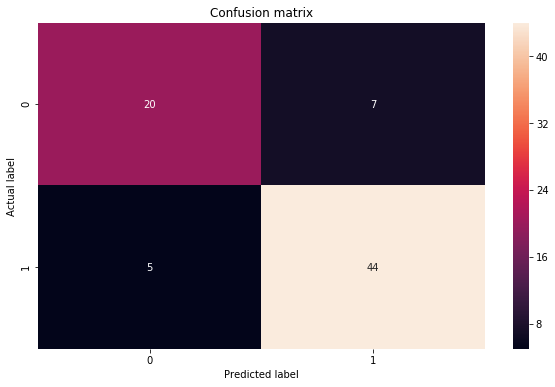

In [162]:
plt.figure(figsize = (10,6))
sn.heatmap(cm_gb, annot=True)
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [163]:
sensitivity_gb = cm_gb[0,0]/(cm_gb[0,0]+cm_gb[0,1])
sensitivity_gb

0.7407407407407407

In [164]:
specificity_gb = cm_gb[1,1]/(cm_gb[1,0]+cm_gb[1,1])
specificity_gb

0.8979591836734694

In [165]:
metrics.precision_score(y_test, y_pred, average='micro')

0.8421052631578947

In [166]:
metrics.precision_score(y_test, y_pred, average='macro')

0.8313725490196079

In [167]:
metrics.precision_score(y_test, y_pred, average='weighted')

0.8404540763673891

In [168]:
matthews_corrcoef(y_test, y_pred)

0.6506114385895281

In [169]:
y_test

[1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1]

                                           Classification Report 

In [170]:
y_test =[1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1]
y_pred = [1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1]
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.82      0.85      0.84        27
     class 1       0.92      0.90      0.91        49

    accuracy                           0.88        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.88      0.88      0.88        76



In [171]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.881578947368421
Precision: 0.9166666666666666
Recall: 0.8979591836734694


Well, you got a classification rate of 85%, considered as good accuracy.

Precision: Precision is about being precise, i.e., how accurate our model is. In other words, we can say, when a model makes a prediction, how often it is correct. In our prediction case, when our Gradient Boosting Classifier predicted hometeam match are going to win from awayteam, that team have 89% of the time.

Recall: If there are hometeam have won result in the test set and our Gradient Boosting Classifier can identify it 87% of the time.


# Multilayer Perceptron  (MLP) Classifier


In [172]:
#Load Liabraies:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,
hidden_layer_sizes=(76, 52), random_state=1)

In [173]:
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(76, 52), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [174]:
mlp.score(X_train,y_train)

1.0

In [175]:
mlp.score(X_test,y_test)

0.8947368421052632

In [176]:
y_pred = mlp.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1])

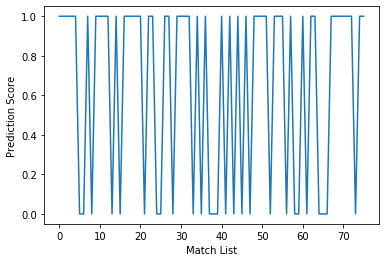

In [177]:
prediction = np.array(y_pred)

plt.ylabel("Prediction Score")
plt.xlabel("Match List")
plt.plot(prediction)

plt.show()

                                          Find Absolute Error

In [178]:
mean_absolute_error(y_test, y_pred)

0.10526315789473684

                                  Model Evaluation using Confusion Matrix

In [179]:
##confusion_matrix = confusion_matrix(expected, predicted)
cm_lp= confusion_matrix(y_test, y_pred)
cm_lp

array([[23,  4],
       [ 4, 45]], dtype=int64)

                                  Visualizing Confusion Matrix using Heatmap

In [180]:
sensitivity_mlp= cm_lp[1,1]/(cm_lp[1,0]+cm_lp[1,1])
sensitivity_mlp

0.9183673469387755

In [181]:
#Specificity = a/(a+b):
specificity_mlp = cm_lp[0,0]/(cm_lp[0,0]+cm_lp[0,1])
specificity_mlp

0.8518518518518519

In [182]:
metrics.precision_score(y_test, y_pred, average='micro')

0.8947368421052632

In [183]:
metrics.precision_score(y_test, y_pred, average='macro')

0.8851095993953138

In [184]:
metrics.precision_score(y_test, y_pred, average='weighted')

0.8947368421052632

In [185]:
matthews_corrcoef(y_test, y_pred)

0.7702191987906274

In [186]:
y_test

[1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1]

                                          Classification Report 

In [187]:
y_test =[1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1]
y_pred = [1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1]
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.82      0.85      0.84        27
     class 1       0.92      0.90      0.91        49

    accuracy                           0.88        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.88      0.88      0.88        76



In [188]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.881578947368421
Precision: 0.9166666666666666
Recall: 0.8979591836734694


Well, you got a classification rate of 85%, considered as good accuracy.

Precision: Precision is about being precise, i.e., how accurate our model is. In other words, we can say, when a model makes a prediction, how often it is correct. In our prediction case, when our Multilayer Perceptron Classifier predicted hometeam match are going to win from awayteam, that team have 89% of the time.

Recall: If there are hometeam have won result in the test set and ourMultilayer Perceptron Classifier can identify it 87% of the time.

                                           Data visualization In 2D
                                           

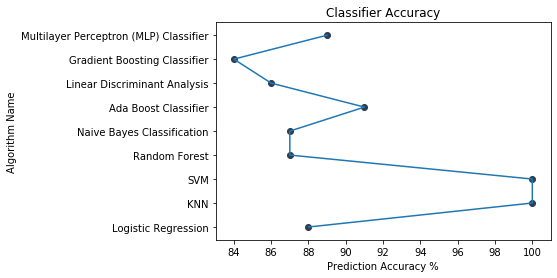

In [189]:
m = ['Logistic Regression','KNN','SVM','Random Forest','Naive Bayes Classification','Ada Boost Classifier','Linear Discriminant Analysis','Gradient Boosting Classifier','Multilayer Perceptron (MLP) Classifier']
n = [88,100,100,87,87,91,86,84,89]
plt.plot(n,m)
plt.scatter(n,m, color = '#2c3e50')
plt.ylabel("Algorithm Name")
plt.xlabel("Prediction Accuracy %")
plt.title("Classifier Accuracy")
plt.show()

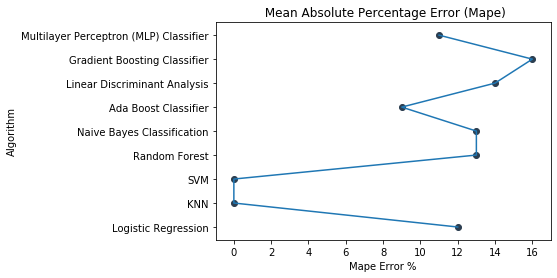

In [190]:
p = ['Logistic Regression','KNN','SVM','Random Forest','Naive Bayes Classification','Ada Boost Classifier','Linear Discriminant Analysis','Gradient Boosting Classifier','Multilayer Perceptron (MLP) Classifier']
q = [12,0,0,13,13,9,14,16,11]
plt.plot(q,p)
plt.scatter(q,p, color = '#2c3e50')
plt.ylabel("Algorithm")
plt.xlabel("Mape Error %")
plt.title(" Mean Absolute Percentage Error (Mape)")
plt.show()

                                            
                                            Data visualization In 3D
    

In [191]:
#Load 3D Liabrary:
from mpl_toolkits.mplot3d import Axes3D

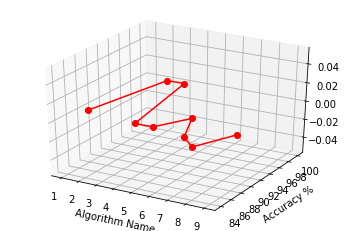

In [192]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#algorithm = ['Logistic Regression','KNN','SVM','Random Forest','Naive Bayes Classification','Ada Boost Classifier','Linear Discriminant Analysis','Gradient Boosting Classifier','Multilayer Perceptron (MLP) Classifier']
m = [1,2,3,4,5,6,7,8,9]
n = [88,100,100,87,87,91,86,84,89]

ax.scatter(m, n, c='r', marker='o')
ax.plot(m, n, c='r', marker='o')

ax.set_xlabel('Algorithm Name')
ax.set_ylabel('Accuracy %')

plt.show()

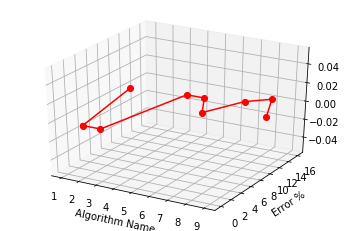

In [193]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#algorithm = ['Logistic Regression','KNN','SVM','Random Forest','Naive Bayes Classification','Ada Boost Classifier','Linear Discriminant Analysis','Gradient Boosting Classifier','Multilayer Perceptron (MLP) Classifier']
m = [1,2,3,4,5,6,7,8,9]
error = q = [12,0,0,13,13,9,14,16,11]

ax.scatter(m, error, c='r', marker='o')
ax.plot(m, error, c='r', marker='o')

ax.set_xlabel('Algorithm Name')
ax.set_ylabel('Error %')

plt.show()

                                             
                                                   Thank You 
        